In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from thesis_toolbox.utils import get_locations_CLP,read_depostion_datasets
from thesis_toolbox.plot.tools import add_letter
from thesis_toolbox.plot.plot_source_contribution import depositon_facet_plot
from dust.plot.plotting import mpl_base_map_plot_xr
from dust.plot.maps import map_terrain_china, map_china
from dust.plot.utils import _gen_flexpart_colormap,_add_colorbar
from matplotlib.colors import LogNorm
from thesis_toolbox.plot.tools import latex_plot
from matplotlib import rc
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
# latex_plot()

In [15]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    psize = snakemake.wildcards.psize
else:
    path = '../../../'
    to_file= False
    psize='2micron'

In [16]:
def min_max_norm(ds):
    out_ds = ds.copy()
    for dvar, da in ds.items():
        da = (da-da.min())/(da.max()-da.min())
        out_ds = out_ds.assign({dvar:da})
    return out_ds

In [21]:
def calc_ratio(ds_tot, ds_f):
    ds_out = ds_tot.copy()
    for dtvar, dvar in zip(ds_tot,ds_f):
        ds_out = ds_out.assign({dtvar:1 -ds_f[dvar]/ds_tot[dtvar]})
    return ds_out

In [22]:
locs = ['SHAPOTOU','BADOE','SACOL','LUOCHUAN','LANTIAN','LINGTAI']
wetdep = read_depostion_datasets(path+'results/model_results/', locs, 'wetdep',psize)
wetdep = wetdep.mean(dim='year')

total = read_depostion_datasets(path+'results/model_results/', locs, 'total_deposition', psize)
total = total.mean(dim='year')

['../../../results/model_results/wetdep/wetdep.SHAPOTOU.2micron.MAM.1999-2019.nc']
['../../../results/model_results/wetdep/wetdep.BADOE.2micron.MAM.1999-2019.nc']
['../../../results/model_results/wetdep/wetdep.SACOL.2micron.MAM.1999-2019.nc']
['../../../results/model_results/wetdep/wetdep.LUOCHUAN.2micron.MAM.1999-2019.nc']
['../../../results/model_results/wetdep/wetdep.LANTIAN.2micron.MAM.1999-2019.nc']
['../../../results/model_results/wetdep/wetdep.LINGTAI.2micron.MAM.1999-2019.nc']
['../../../results/model_results/total_deposition/total_deposition.SHAPOTOU.2micron.MAM.1999-2019.nc']
['../../../results/model_results/total_deposition/total_deposition.BADOE.2micron.MAM.1999-2019.nc']
['../../../results/model_results/total_deposition/total_deposition.SACOL.2micron.MAM.1999-2019.nc']
['../../../results/model_results/total_deposition/total_deposition.LUOCHUAN.2micron.MAM.1999-2019.nc']
['../../../results/model_results/total_deposition/total_deposition.LANTIAN.2micron.MAM.1999-2019.nc']
['

In [23]:
ratio_wetdep = calc_ratio(total, wetdep)

In [24]:
ratio_wetdep=ratio_wetdep.fillna(0)

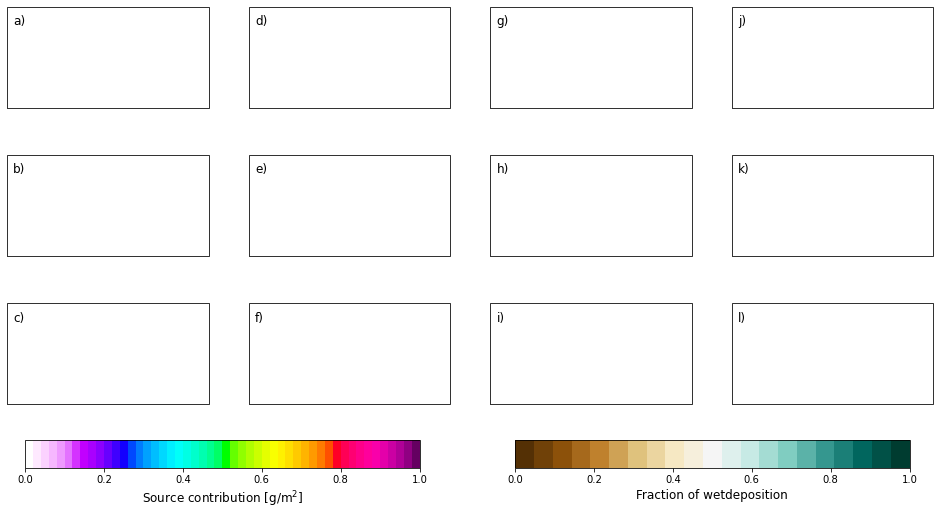

In [34]:
fig,ax = plt.subplots(nrows=3, ncols=4,  figsize=(8.3*2, 11.7*0.66), subplot_kw={'projection':ccrs.PlateCarree()})

cmap = _gen_flexpart_colormap()
cmap = cm.get_cmap(cmap,21)
depositon_facet_plot(total,  
                    add_labels=False, ax=ax[:,:2]
                    , hspace=0.05, wspace=0.18,  
                    fontsize_title=8, colorbar=False, vmin=1e-7,vmax=1e-3,cmap=cmap)
cax = fig.add_axes([0.14, 0.03,0.33,0.05])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.LogNorm(1e-7, 1e-3), cmap=cmap), cax=cax,
            label='Source contribution [$\mathrm{g/m}^2$]', orientation='horizontal')
cmap = cm.get_cmap('BrBG',21)
depositon_facet_plot(ratio_wetdep,  
                    add_labels=False, ax=ax[:,2:]
                    , hspace=0.05, wspace=0.18,  
                    fontsize_title=8, colorbar=False,norm=matplotlib.colors.TwoSlopeNorm(0.5), cmap=cmap)
fig = plt.gcf()
# cmap = _gen_flexpart_colormap()
cax = fig.add_axes([0.55, 0.03,0.33,0.05])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.TwoSlopeNorm(0.5), cmap=cmap), cax=cax,
            label='Fraction of wetdeposition', orientation='horizontal')
add_letter(ax.T,y=0.82, fontsize=12)
if to_file:
    plt.savefig(snakemake.output.combopath,bbox_inches='tight', dpi=300)
